# HW 2 Chapter 3

In [1]:
from helper_functions import *

This question involves the use of simple linear regression on the Auto data set.


a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

- i. Is there a relationship between the predictor and the response?
- ii. How strong is the relationship between the predictor and the response?
- iii. Is the relationship between the predictor and the response positive or negative?
- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [2]:
auto_df = pd.read_csv('../Homework_data/auto.csv')

In [23]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')

In [26]:
auto_df.dropna(inplace=True)

In [29]:
X = auto_df['horsepower']
y = auto_df[['mpg']]

In [27]:
design = MS(['horsepower'])
X_OLS = design.fit_transform(auto_df)

In [31]:
regression = sm.OLS(y, X_OLS)
results = regression.fit()

In [32]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [37]:
results.conf_int(alpha=0.05)

,0,1
intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [35]:
results.predict([1, 98])

array([24.46707715])

- i. Is there a relationship between the predictor and the response?
    
    - Yes there does seem to be a relationship between the predictor and the response variable as the p-value is below 0.05 supporting
    the fact that there is a relationship between horsepower and mpg

- ii. How strong is the relationship between the predictor and the response?
    - For one unit increase in horsepower, that results in a decrease in mpg by 0.157 so not crazy strong between the two 

- iii. Is the relationship between the predictor and the response positive or negative?
    - The relationship is negative 

- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
    - intercept = [38.525, 41.346]
    - horsepower = [-0.1705, -0.1452]
    - Predicted MPG for horsepower of 98 is: 24.46707715


b) Plot the response and the predictor in a new set of axes. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

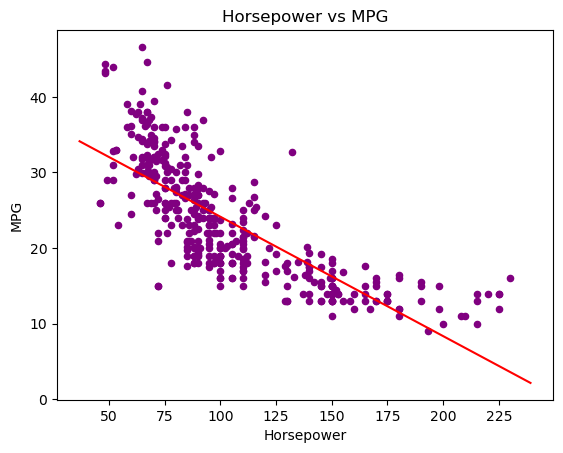

In [49]:
fig, ax = plt.subplots()
ax.scatter(X_OLS['horsepower'], y, color = 'purple', s = 20)

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('Horsepower vs MPG')
#ax.plot(X_OLS['horsepower'], results.predict(X_OLS), color='red')
abline(ax, *results.params, color = 'red')

c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

# Residuals

Text(0, 0.5, 'Residuals')

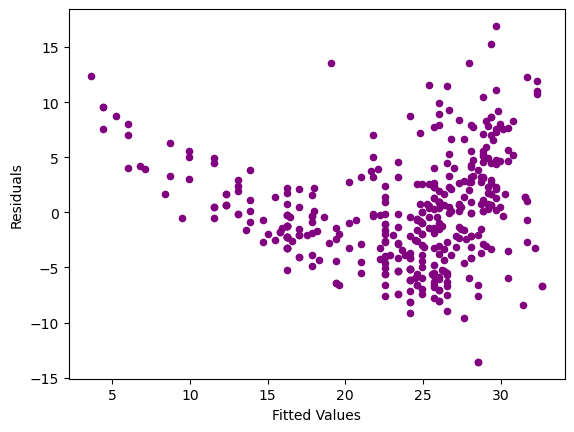

In [50]:
fig, ax = plt.subplots()
ax.scatter(results.predict(X_OLS), results.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

I can see that there does tend to be some structure in the residuals implying that the linear model is not a good model for this data set and we may need to use higher order terms remove the structure in the residuals

# Influence

np.int64(115)

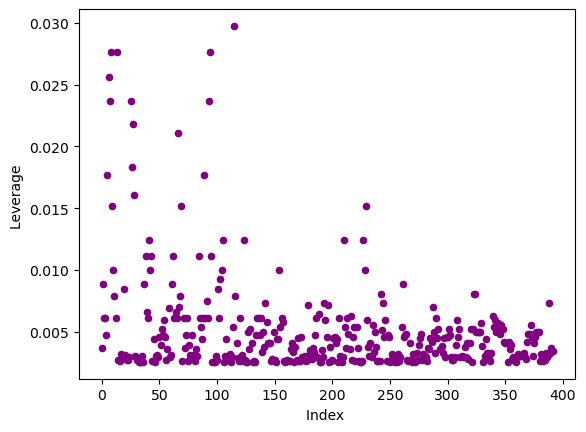

In [54]:
infl = results.get_influence ()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape [0]) , infl. hat_matrix_diag , color = 'purple', s = 20)
ax.set_xlabel ('Index ')
ax.set_ylabel ('Leverage ')
np.argmax(infl. hat_matrix_diag )

The above shows the leverage and i think this means that the data at those indexes are how much they are influencing the fit and it does seem that the larger Leverage points could be potential outliers in the data set, subsequent runs of the model should remove these and see how the fit improves.

# Question 9

This question involves the use of multiple linear regression on the Auto data set.

a)Produce a scatterplot matrix which includes all of the variables in the data set.

In [55]:
import seaborn as sns

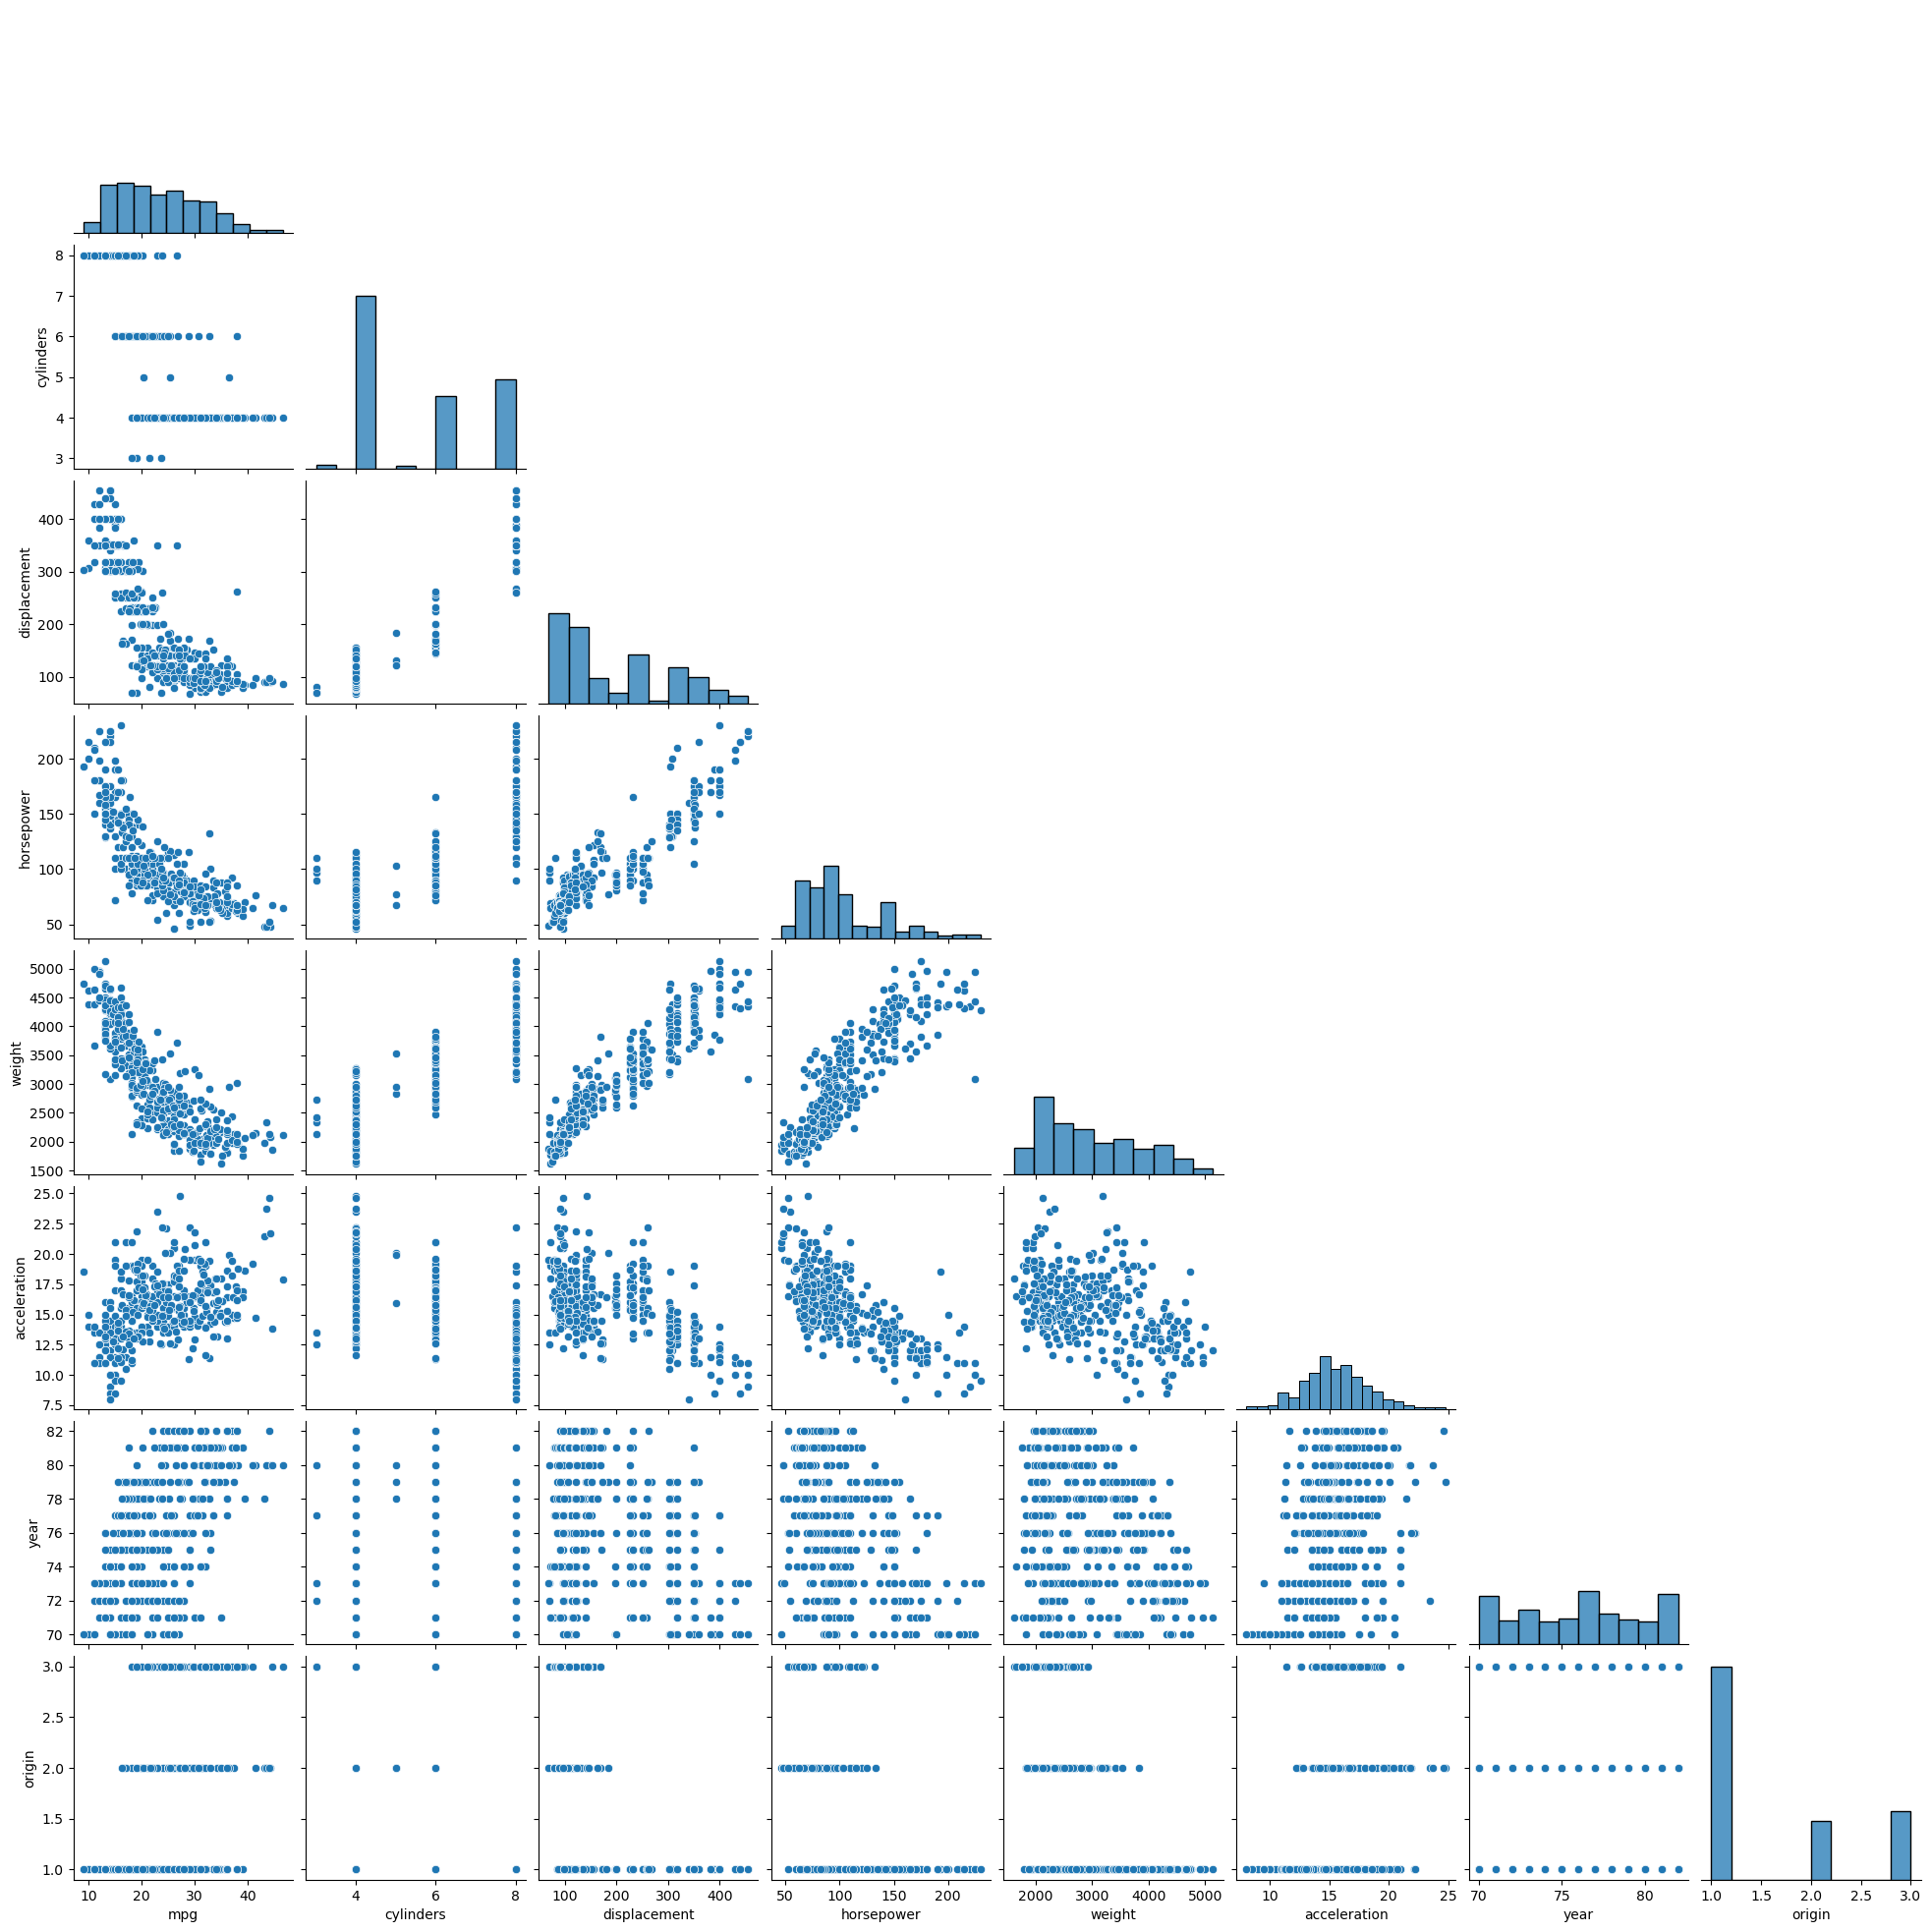

In [56]:
sns.pairplot(auto_df, corner = True)

b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [59]:
auto_df.drop('name', axis = 1).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

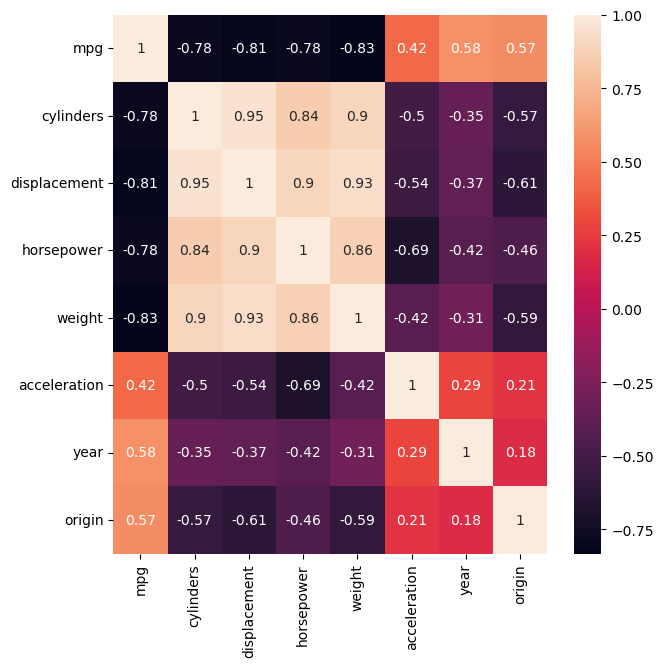

In [63]:
fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(auto_df.drop('name', axis = 1).corr(), annot = True, ax = ax)

c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. 

For instance:

- Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.
- Which predictors appear to have a statistically significant relationship to the response?
- What does the coefficient for the year variable suggest

In [64]:
auto_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [67]:
feature_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
design = MS(feature_cols)
X_MLS = design.fit_transform(auto_df)
y = auto_df[['mpg']]
regression = sm.OLS(y, X_MLS)
results = regression.fit()

In [79]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [76]:
df = anova_lm(*[sm.OLS(y, D).fit() for D in design.build_sequence(X_MLS, anova_type='sequential')])
df.index = design.names

In [78]:
df

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
intercept,391.0,23818.993469,0.0,NaN,NaN,NaN
cylinders,390.0,9415.910391,1.0,14403.083079,1300.683788,2.806569e-126
displacement,389.0,8342.566366,1.0,1073.344025,96.929329,1.442524e-20
horsepower,388.0,7939.158297,1.0,403.408069,36.430140,3.700154e-09
weight,387.0,6963.433344,1.0,975.724953,88.113748,5.378297e-19
acceleration,386.0,6962.467273,1.0,0.966071,0.087242,7.678720e-01
year,385.0,4543.347025,1.0,2419.120249,218.460900,1.794078e-39
origin,384.0,4252.212530,1.0,291.134494,26.291171,4.665681e-07


- Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.
    - Yes there does seem to be some relationship between some of the predictors and the response variable
- Which predictors appear to have a statistically significant relationship to the response?
    - Notably the cylinders, displacement, horsepower, weight, year and origin. Acceleration and seems to be the only one that does not have a relationship with the response. 
- What does the coefficient for the year variable suggest
    - 0.7508 The coefficient here suggest that year plays a small role in the final MPG calculations as a single increase in year would increase the MPG by 0.75	

d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

Text(0, 0.5, 'Residuals')

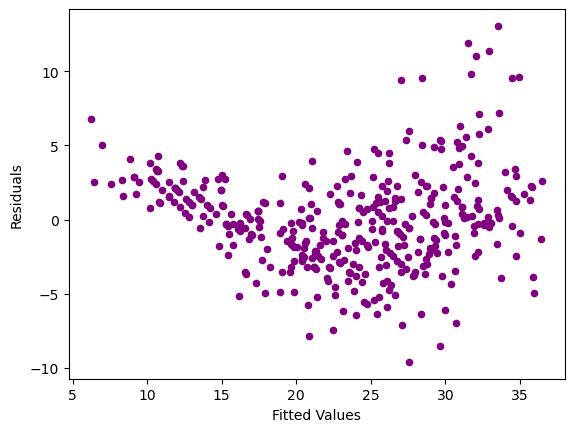

In [80]:
fig, ax = plt.subplots()
ax.scatter(results.predict(X_MLS), results.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')


Text(0, 0.5, 'Leverage')

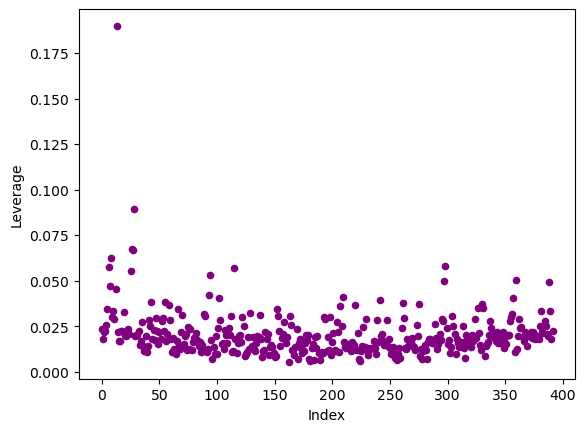

In [82]:
infl = results.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X_MLS.shape[0]), infl.hat_matrix_diag, color='purple', s=20)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

- Comment on any problems you see with the fit. 
    - The main problem that I see is in the residual plot where it is still showing a kinda U-shape to the scatter points indicating that it is not capturing the edge cases that well with low and high MPG cars. This could be due to our simple linear model approach and could benifit from higher order terms or even some interaction terms with the predictors
- Do the residual plots suggest any unusually large outliers? 
    - There does seem to be a large number of sources at high MPG that are definitely outside of the trends from the rest of the data suggesting they could be outliers
- Does the leverage plot identify any observations with unusually high leverage?
    - Yes there is one at index 13 that is unusally high

e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [102]:
#getting the features columns from the DF
df_features = ['cylinders',
                'displacement',
                'horsepower',
                'weight',
                'acceleration',
                'year',
                'origin']

In [ ]:
#making the interaction terms for all possible permutations of the features
interaction_terms = df_features+ [('cylinders', 'displacement'), 
                     ('cylinders', 'horsepower'), 
                        ('cylinders', 'weight'), ('cylinders', 'acceleration'), ('cylinders', 'year'), ('cylinders', 'origin'), ('displacement', 'horsepower'), ('displacement', 'weight'), ('displacement', 'acceleration'), ('displacement', 'year'), ('displacement', 'origin'), ('horsepower', 'weight'), ('horsepower', 'acceleration'), ('horsepower', 'year'), ('horsepower', 'origin'), ('weight', 'acceleration'), ('weight', 'year'), ('weight', 'origin'), ('acceleration', 'year'), ('acceleration', 'origin'), ('year', 'origin')]

In [104]:
X = MS(interaction_terms).fit_transform(auto_df)
y = auto_df[['mpg']]
regression = sm.OLS(y, X)
results = regression.fit()

In [105]:
summarize(results)

,coef,std err,t,P>|t|
intercept,35.478900,53.136000,0.668,0.505
cylinders,6.988600,8.248000,0.847,0.397
displacement,-0.478500,0.189000,-2.527,0.012
horsepower,0.503400,0.347000,1.451,0.148
weight,0.004100,0.018000,0.235,0.814
acceleration,-5.859200,2.174000,-2.696,0.007
year,0.697400,0.610000,1.144,0.253
origin,-20.895600,7.097000,-2.944,0.003
cylinders:displacement,-0.003400,0.006000,-0.524,0.601
cylinders:horsepower,0.011600,0.024000,0.480,0.632


Text(0, 0.5, 'Residuals')

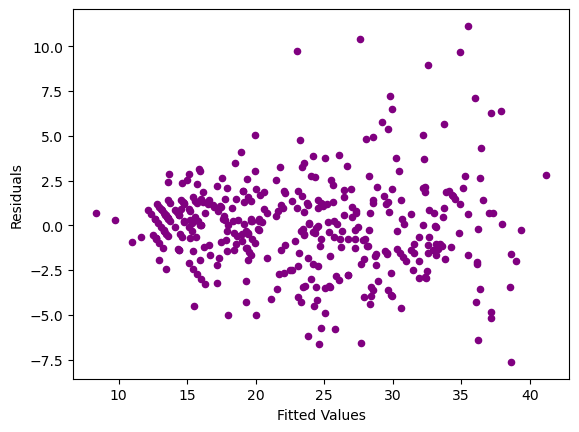

In [108]:
fig, ax = plt.subplots()
ax.scatter(results.predict(X), results.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')


I can see that there are some interaction terms that do not seem to matter as the p-value for them seems to be below the 0.05 value

Some of those are the interactions:
- cylinders and origin
- displacement and acceleration
- horsepower and weight 
- weight and origin 

and more. 

One thing that I can see from the residuals is that there seems to be no trends which is good which would indicate that these interactions terms are able to help capture some of the extra features that the features by themselves cannot seem to model. So a better fit at the cost of some of these interactions terms not really helping drive the fit. So a fit with these terms with high p-values removed would be the next model to test and see how the residuals look for that linear model. 

In [100]:
X

,intercept,displacement,horsepower,weight,acceleration,year,origin,cylinders:displacement,cylinders:horsepower,cylinders:weight,...,horsepower:weight,horsepower:acceleration,horsepower:year,horsepower:origin,weight:acceleration,weight:year,weight:origin,acceleration:year,acceleration:origin,year:origin
0,1.0,307.0,130.0,3504,12.0,70,1,2456.0,1040.0,28032.0,...,455520.0,1560.0,9100.0,130.0,42048.0,245280.0,3504.0,840.0,12.0,70.0
1,1.0,350.0,165.0,3693,11.5,70,1,2800.0,1320.0,29544.0,...,609345.0,1897.5,11550.0,165.0,42469.5,258510.0,3693.0,805.0,11.5,70.0
2,1.0,318.0,150.0,3436,11.0,70,1,2544.0,1200.0,27488.0,...,515400.0,1650.0,10500.0,150.0,37796.0,240520.0,3436.0,770.0,11.0,70.0
3,1.0,304.0,150.0,3433,12.0,70,1,2432.0,1200.0,27464.0,...,514950.0,1800.0,10500.0,150.0,41196.0,240310.0,3433.0,840.0,12.0,70.0
4,1.0,302.0,140.0,3449,10.5,70,1,2416.0,1120.0,27592.0,...,482860.0,1470.0,9800.0,140.0,36214.5,241430.0,3449.0,735.0,10.5,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1.0,140.0,86.0,2790,15.6,82,1,560.0,344.0,11160.0,...,239940.0,1341.6,7052.0,86.0,43524.0,228780.0,2790.0,1279.2,15.6,82.0
393,1.0,97.0,52.0,2130,24.6,82,2,388.0,208.0,8520.0,...,110760.0,1279.2,4264.0,104.0,52398.0,174660.0,4260.0,2017.2,49.2,164.0
394,1.0,135.0,84.0,2295,11.6,82,1,540.0,336.0,9180.0,...,192780.0,974.4,6888.0,84.0,26622.0,188190.0,2295.0,951.2,11.6,82.0
395,1.0,120.0,79.0,2625,18.6,82,1,480.0,316.0,10500.0,...,207375.0,1469.4,6478.0,79.0,48825.0,215250.0,2625.0,1525.2,18.6,82.0


In [106]:
df = anova_lm(*[sm.OLS(y, D).fit() for D in design.build_sequence(X, anova_type='sequential')])
df.index = design.names

f) Try a few different transformations of the variables, such as log(X), $\sqrt{X}$, $X^2$. Comment on your findings.

Text(0, 0.5, 'Residuals')

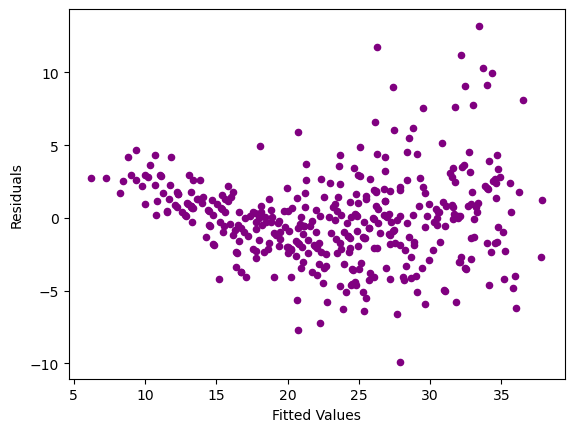

In [112]:
input_X = np.log10(X)
log_regression = sm.OLS(y, input_X)
log_results = log_regression.fit()

fig, ax = plt.subplots()
ax.scatter(log_results.predict(input_X), log_results.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')


Text(0, 0.5, 'Residuals')

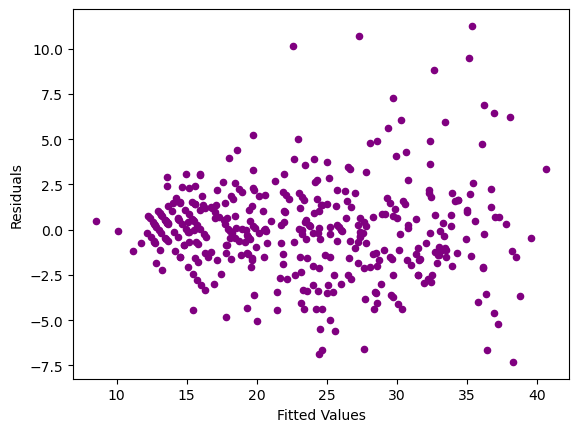

In [110]:
input_X = np.sqrt(X)

sqrt_regression = sm.OLS(y, input_X)
sqrt_results = sqrt_regression.fit()

fig, ax = plt.subplots()
ax.scatter(sqrt_results.predict(input_X), sqrt_results.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')


Text(0, 0.5, 'Residuals')

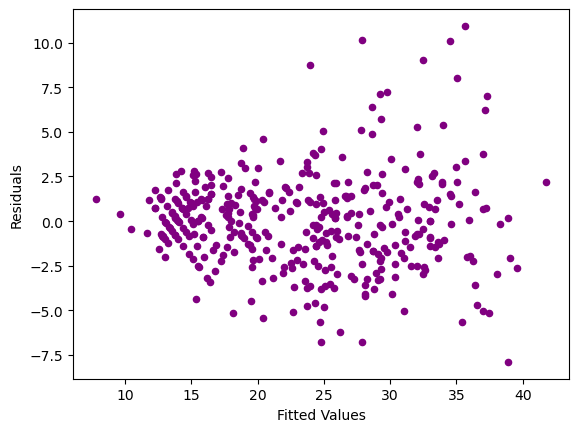

In [111]:
input_X = X**2

squared_regression = sm.OLS(y, input_X)
squared_results = squared_regression.fit()

fig, ax = plt.subplots()
ax.scatter(squared_results.predict(input_X), squared_results.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')


I can see that the different transformation affects the model fit. The most drastic is the log10 transformation as that seemed to make the model fit be bad since there seems to be some structure in the residuals implying the model is not doing a good job at fitting the fill data set. The other two transformation the sqrt and the squared seems to show the same residuals or close to similar results implying that these transformation is not affecting the linear model much where the log10 tranformation affects the input_x modeling. If I had to guess why this is the case it would be because we have lots of 1 and then a log transform makes that 0 which could affect the parameter estimates for the coefficients in the linear models. 

10. This question should be answered using the Carseats data set.

a) Fit a multiple regression model to predict Sales using Price, Urban, and US.


In [114]:
carseat_df = pd.read_csv('../Homework_data/Carseats.csv')

In [118]:
carseat_df['Urban'] = carseat_df['Urban'].map({'No': 0, 'Yes': 1})
carseat_df['US'] = carseat_df['US'].map({'No': 0, 'Yes': 1})

In [120]:
features = ['Price', 'Urban', 'US']

In [124]:
X_carseat = MS(features).fit_transform(carseat_df)
y_carseat = carseat_df[['Sales']]
car_regression = sm.OLS(y_carseat, X_carseat)
car_results = car_regression.fit()

In [122]:
summarize(car_results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban,-0.0219,0.272,-0.081,0.936
US,1.2006,0.259,4.635,0.000


b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

- Price: For every unit of increase in the price we can see that the sales would decrease by a small amount only a change of -0.05
- Urban: The input for these variables are 1 and 0 and since we are seeing that for urban the coefficient is -0.02 it would seems to indicate that whenever there is an Urban with a vallue of 1 it only contributes to the sales by this -0.02
- US: This is also a binary categorical variable but does seem to show that whenever this variabel is set to 1 it does seem to have a big impact on the sales compared to the other variables. 

c) Write out the model in equation form, being careful to handle the qualitative variables properly.

If US = 0 and Urban = 0: 

$y = 13.0435 + -0.0545*Price$ 

if US = 1 and Urban = 0:

$y = 13.0435 + -0.0545*Price + 1.2006*US$ 

if US = 0 and Urban = 1:

$y = 13.0435 + -0.0545*Price - 0.0219*Urban$

if US = 1 and Urban = 1:

$y = 13.0435 + -0.0545*Price - 0.0219*Urban + 1.2006*US$ 

d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

The only predictor that we can reject the null hypothesis is the Urban variable since that has a rather high p-value of 0.936

e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [125]:
remove_urban = ['Price', 'US']
X_carseat_urban_removed = MS(remove_urban).fit_transform(carseat_df)
y_carseat = carseat_df[['Sales']]
car_regression = sm.OLS(y_carseat, X_carseat_urban_removed)
car_results_new = car_regression.fit()
summarize(car_results_new)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US,1.1996,0.258,4.641,0.0


f) How well do the models in (a) and (e) fit the data

Looking at the residuals both models look very similar and hard to see any features in the residuals which would indicate that one model did better than the other. Since they looks similar they seem to both do a good enough jobs to fit the data/model.

Text(0, 0.5, 'Residuals')

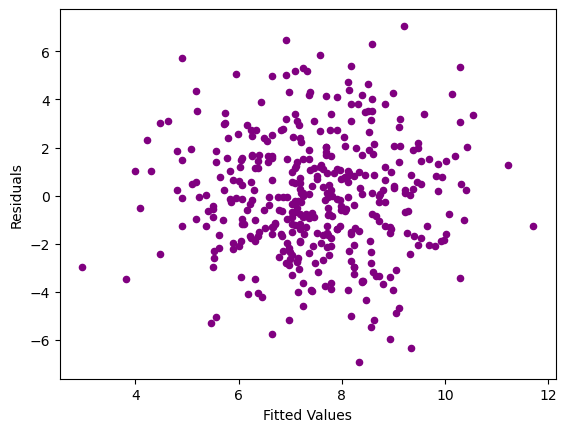

In [126]:
fig, ax = plt.subplots()
ax.scatter(car_results.predict(X_carseat), car_results.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

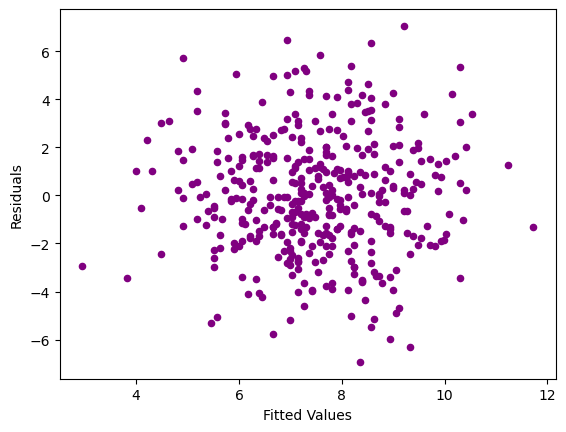

In [127]:
fig, ax = plt.subplots()
ax.scatter(car_results_new.predict(X_carseat_urban_removed), car_results_new.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s)

In [138]:
car_results_new.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


h) Is there evidence of outliers or high leverage observations in the model from (e)?

There does seem to be some that are very distant from the other data points implying that there does seem to be some outliers in the data or some points that could be biasing the fit.

Text(0, 0.5, 'Leverage')

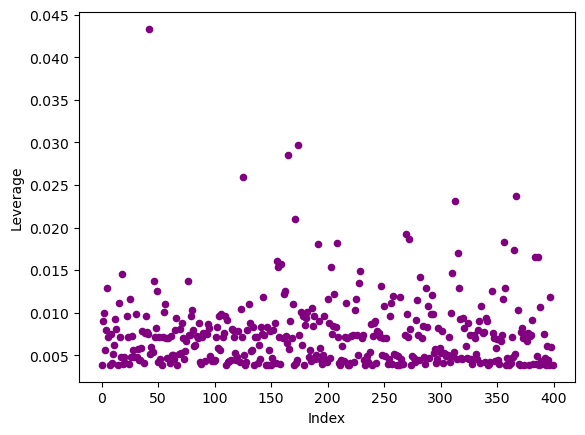

In [139]:
infle = car_results_new.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X_carseat_urban_removed.shape[0]), infle.hat_matrix_diag, color='purple', s=20)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [160]:
np.random.seed(1)

b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N (0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [175]:
X = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.25, 100)

c) Using x and eps, generate a vector y according to the model

Y=−1 + 0.5X + ϵ.

What is the length of the vector y? What are the values of β0 and β1 in this linear model?

Length of vector Y is 100, beta_0 is -1 and beta_1 is 0.5

In [176]:
Y = -1 + 0.5*X + eps

len(Y)

100

d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

The data is very linear with some deviation away from the 1-to-1 line. 

Text(0, 0.5, 'Y')

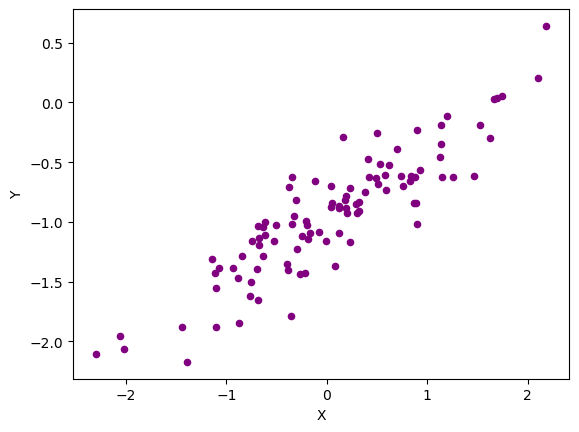

In [150]:
fig, ax = plt.subplots()
ax.scatter(X, Y, color = 'purple', s = 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')

e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do β0_hat and β1_hat compare to β0 and
β1?

Beta0_Hat is -0.9632 which is very close to the -1 input we put in
Beta1_hat is 0.5239 which is very close to the 0.5 value we input to gerneate the data

In [177]:
X_ols = MS(['X']).fit_transform(pd.DataFrame(X, columns = ['X']))
Y = pd.DataFrame(Y, columns = ['Y'])
regression = sm.OLS(Y, X_ols)
results = regression.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.9761,0.023,-41.982,0.0
X,0.4708,0.023,20.899,0.0


f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

Text(0, 0.5, 'Y')

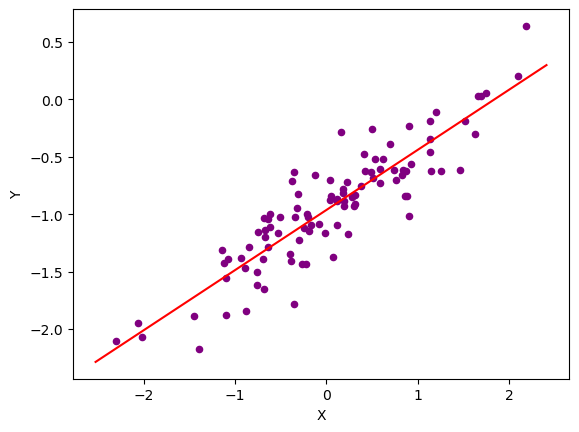

In [156]:
fig, ax = plt.subplots()
ax.scatter(X, Y, color = 'purple', s = 20)
abline(ax, *results.params, color = 'red')
ax.set_xlabel('X')
ax.set_ylabel('Y')

g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

There is no evidence and that comes down tot he p-value being high in that term which tests whether that term is needed as opposed ot having the term being 0.

In [164]:
X_df = pd.DataFrame(X, columns = ['X'])

In [167]:
X_poly = MS([poly('X', degree =2)]).fit_transform(X_df)
model_poly = sm.OLS(Y, X_poly)
results_poly = model_poly.fit()

In [168]:
summarize(results_poly)

,coef,std err,t,P>|t|
intercept,-0.9315,0.024,-39.544,0.000
"poly(X, degree=2)[0]",4.6370,0.236,19.685,0.000
"poly(X, degree=2)[1]",0.0427,0.236,0.181,0.856


h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

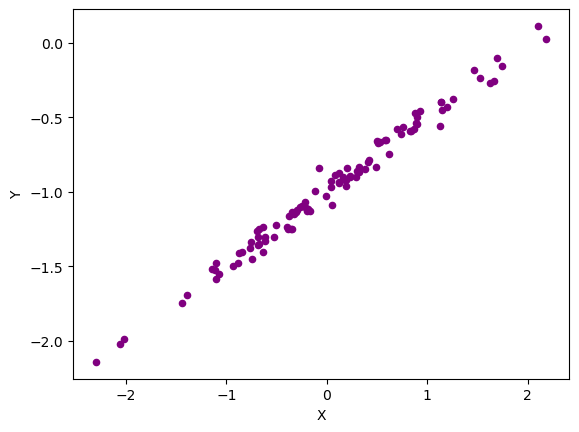

,coef,std err,t,P>|t|
intercept,-0.9324,0.105,-8.902,0.0
X,0.4459,0.118,3.778,0.0


In [173]:
#X = np.random.normal(0, 1, 100)
eps_less_noisy = np.random.normal(0, .05, 100)
Y_less_noise = -1 + 0.5*X + eps_less_noisy

fig, ax = plt.subplots()
ax.scatter(X, Y_less_noise, color = 'purple', s = 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

X_ols = MS(['X']).fit_transform(pd.DataFrame(X, columns = ['X']))
Y_less_noisy = pd.DataFrame(Y_less_noise, columns = ['Y'])
regression = sm.OLS(Y_less_noisy, X_ols)
results_less_noise = regression.fit()
summarize(results)

i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

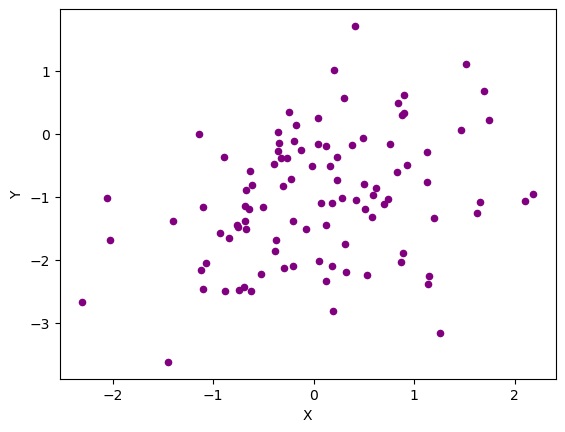

,coef,std err,t,P>|t|
intercept,-0.9324,0.105,-8.902,0.0
X,0.4459,0.118,3.778,0.0


In [174]:
#X = np.random.normal(0, 1, 100)
eps_noisy = np.random.normal(0, 1, 100)
Y_noise = -1 + 0.5*X + eps_noisy

fig, ax = plt.subplots()
ax.scatter(X, Y_noise, color = 'purple', s = 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

X_ols = MS(['X']).fit_transform(pd.DataFrame(X, columns = ['X']))
Y_noisy = pd.DataFrame(Y_noise, columns = ['Y'])
regression = sm.OLS(Y_noisy, X_ols)
results_noisy = regression.fit()
summarize(results)

j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

Here is what I see:

- Original setup: Beta0 = [-1.002246, -0.929967], Beta1 = [0.426122, 0.515537]
- Less Noise setup: Beta0 = [-1.004048	-0.983114], Beta1 = [0.485898	0.509492]
- More Noise setup: Beta0 = [-1.240392	-0.857587], Beta1 = [0.143530	0.574993]

One thing that i am seeing is that the 95% confidence interval does seem to be depend on the noise of the data with a less noisy data set having smaller ranges in the coefficients for betas where as more noise data has larger confidence intervals.

In [178]:
results.conf_int(alpha=0.05)

,0,1
intercept,-1.022246,-0.929967
X,0.426122,0.515537


In [179]:
results_less_noise.conf_int(alpha=0.05)

,0,1
intercept,-1.004048,-0.983114
X,0.485898,0.509492


In [180]:
results_noisy.conf_int(alpha=0.05)

,0,1
intercept,-1.240392,-0.857587
X,0.143530,0.574993


Problem 14

a) The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. 

What are the regression coefficients?

$x_2 = 0.5x_1 + \epsilon$

$y = 2 + 2 * x_1 + 0.3 * x_2 + \epsilon$

In [181]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

b) What is the correlation between x1 and x2? 

Create a scatterplot displaying the relationship between the variables.

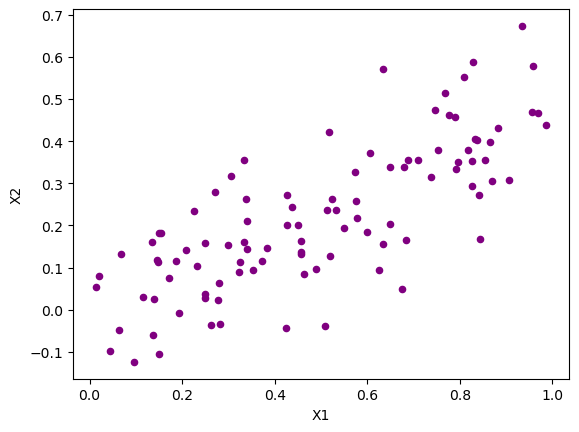

In [182]:
fig, ax = plt.subplots()
ax.scatter(x1, x2, color = 'purple', s = 20)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. 

What are the betas? 

β0 = 1.9579
β1 = 1.6154
β2 = 0.9428

How do these relate to the true β0, β1, and β2? 

β0 = 2, β1 = 2, and β2 = 0.3

beta_0 seems to be spot on or close enough to the input, Beta_1 is close but not quite close enough  and beta_2 is over predicted. This is most definitely caused by the collinearity introduced between x1 and x2.

Can you reject the null hypothesis H0 : β1 = 0? 

according the to summarize statistics from the modeling it says we can with a p-value of .003 for beta1

How about the null hypothesis H0 : β2 = 0?

according the to summarize statistics from the modeling it says we cannot with a p-value of 0.259 for beta2


In [183]:
X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
Y = pd.DataFrame(y, columns = ['y'])
regression = sm.OLS(Y, X)
results = regression.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


d) Now fit a least squares regression to predict y using only x1. Comment on your results. 

Can you reject the null hypothesis H0 : β1 = 0?

This is isaying we can reject the null hypothesis since the p-value is below 0.05

In [195]:
def fit_x1_only(x1, y):
    X = MS(['x1']).fit_transform(pd.DataFrame({'x1': x1}))
    Y = pd.DataFrame(y, columns = ['y'])
    regression = sm.OLS(Y, X)
    results = regression.fit()
    return results, X

In [184]:
X = MS(['x1']).fit_transform(pd.DataFrame({'x1': x1}))
Y = pd.DataFrame(y, columns = ['y'])
regression = sm.OLS(Y, X)
results = regression.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


e) Now fit a least squares regression to predict y using only x2.

Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [196]:
def fit_x2_only(x2, y):
    X = MS(['x2']).fit_transform(pd.DataFrame({'x2': x2}))
    Y = pd.DataFrame(y, columns = ['y'])
    regression = sm.OLS(Y, X)
    results = regression.fit()
    return results, X

In [185]:
X = MS(['x2']).fit_transform(pd.DataFrame({'x2': x2}))
Y = pd.DataFrame(y, columns = ['y'])
regression = sm.OLS(Y, X)
results = regression.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


f) Do the results obtained in (c)–(e) contradict each other? 

Explain your answer.

At first glance they seem to contradict, in which when we modeled them together with both x1 and x2, the p-value seemed to suggest we do not need x2. However when we inputted them seperately they seemed to have predictive power, as both individually can be used to predict the y-value. But one thing to note is that I think the p-value test that is being conducted cannot take into account and collinearity so we would need some other test to see if it can catch that.

g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

Re-fit the linear models from (c) to (e) using this new data. 

What effect does this new observation have on the each of the models?
In each model, is this observation an outlier? 
A high-leverage point? Both? 

Explain your answers.

It seems that when we fit it with both x1 and x2 that new data point is an outlier as it has a high leverage. 
However, when we fit it with x1 that seems to not be the case as the leverage seems to be more similar across the board
Then when we go back to just using the x2 model the high leverage is back again indicating that this data point is heaviy impacting the x2 terms and is why we see it in the full model when using x1 and x2 and only x2 but we do not see it in the x1 leverage.

In [186]:
x1 = np. concatenate ([x1 , [0.1]])
x2 = np. concatenate ([x2 , [0.8]])
y = np. concatenate ([y, [6]])

X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
Y = pd.DataFrame(y, columns = ['y'])
regression = sm.OLS(Y, X)
results = regression.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [194]:
def fit_x1_x2(x1, x2, y):
    X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
    Y = pd.DataFrame(y, columns = ['y'])
    regression = sm.OLS(Y, X)
    results = regression.fit()
    return results, X

In [197]:
result_both, X_both = fit_x1_x2(x1, x2, y)
result_x1, X_x1 = fit_x1_only(x1, y)
result_x2, X_x2 = fit_x2_only(x2, y)

Text(0, 0.5, 'Residuals')

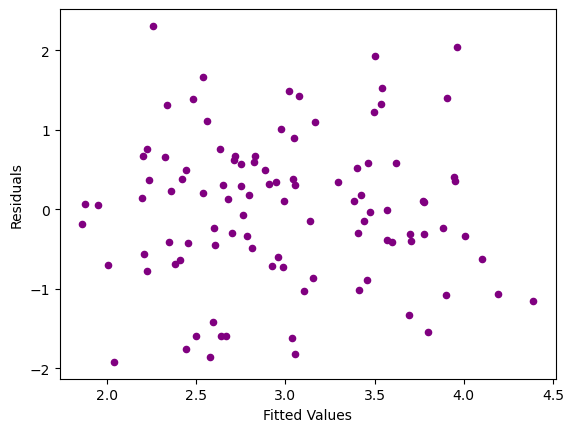

In [198]:
fig, ax = plt.subplots()
ax.scatter(result_both.predict(X_both), result_both.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

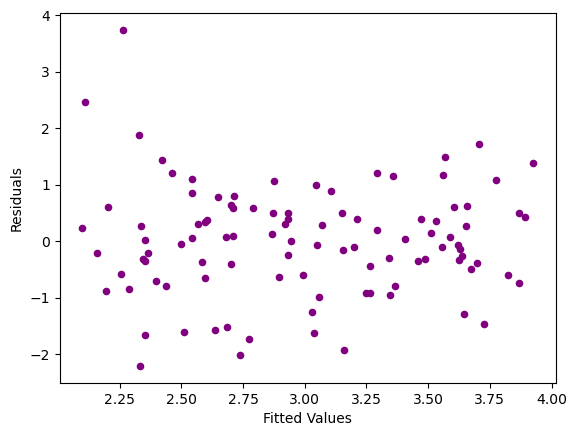

In [199]:
fig, ax = plt.subplots()
ax.scatter(result_x1.predict(X_x1), result_x1.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

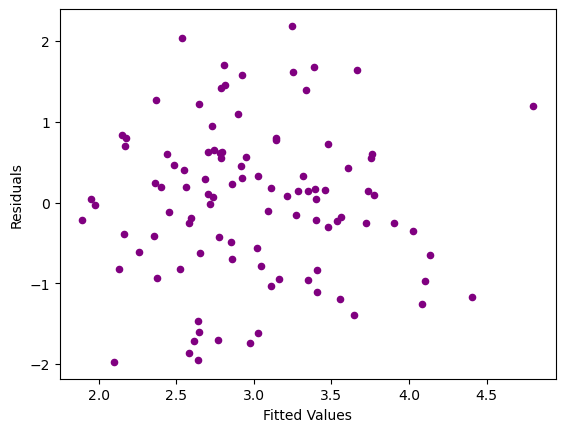

In [200]:
fig, ax = plt.subplots()
ax.scatter(result_x2.predict(X_x2), result_x2.resid, color = 'purple', s = 20)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Leverage')

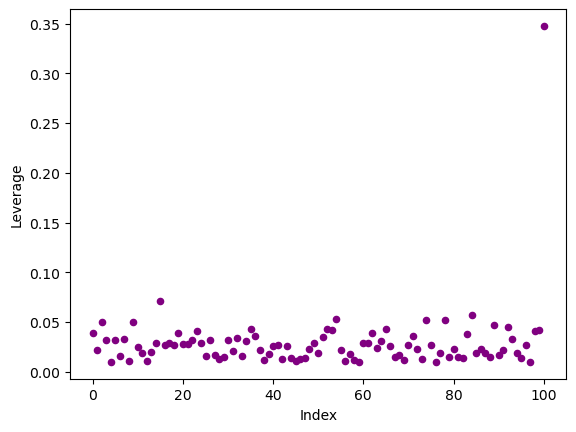

In [201]:
infl = result_both.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, color='purple', s=20)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

Text(0, 0.5, 'Leverage')

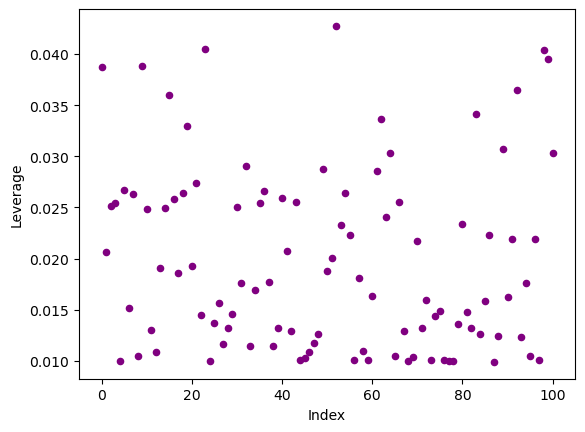

In [202]:
infl = result_x1.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, color='purple', s=20)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

Text(0, 0.5, 'Leverage')

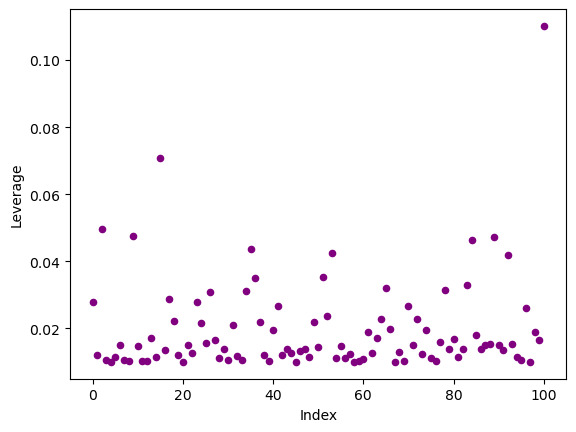

In [203]:
infl = result_x2.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, color='purple', s=20)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')